In [1]:
import numpy as np
import pandas as pd
import sklearn as sl
import scipy as sp
import seaborn as sb
from matplotlib import pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
df = pd.read_csv("dataset_lm.csv")

In [3]:
df.describe(include='all')

,Dependent Var,Explanatory Var #1,Explanatory Var #2,Explanatory Var #3,Explanatory Var #4,Explanatory Var #5,Explanatory Var #6,Explanatory Var #7,Explanatory Var #8,Explanatory Var #9,Explanatory Var #10,Explanatory Var #11,Explanatory Var #12,Explanatory Var #13,Explanatory Var #14,Explanatory Var #15
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,67.838396,7.762058,59.725134,0.500000,-16.078411,50.133715,10.420808,61.887309,1.566351,-24.511691,49.728665,7.740874,60.765794,0.500000,-16.673762,50.066901
std,25.676960,7.013243,9.579112,0.500593,8.111197,6.975674,11.520725,14.819969,1.115260,8.500500,6.910690,7.102714,9.525835,0.500593,8.106466,6.794584
min,-2.997183,-4.832834,44.124858,0.000000,-29.774797,30.009511,-9.828552,34.093154,0.000000,-39.979696,26.436407,-4.949728,44.158200,0.000000,-29.750628,32.118882
25%,49.482037,1.720182,51.617692,0.000000,-23.792637,45.423422,-0.174835,49.952772,1.000000,-32.037707,45.283603,1.838210,52.849792,0.000000,-23.797763,45.825931
50%,66.780110,7.905455,59.735139,0.500000,-15.875481,50.093602,10.422513,62.554591,2.000000,-23.767548,49.842746,8.055297,60.773906,0.500000,-17.373619,50.038667
75%,86.801496,13.684104,67.870073,1.000000,-9.185191,54.896583,21.059713,74.441216,3.000000,-17.419390,54.576381,14.020396,69.262757,1.000000,-9.627544,54.962602
max,133.384795,19.973331,76.973576,1.000000,-2.060708,70.365951,29.994610,86.895006,3.000000,-10.129522,68.201681,19.992891,76.639179,1.000000,-2.003168,69.147818


In [4]:
df.columns

Index(['Dependent Var', 'Explanatory Var #1', 'Explanatory Var #2',
       'Explanatory Var #3', 'Explanatory Var #4', 'Explanatory Var #5',
       'Explanatory Var #6', 'Explanatory Var #7', 'Explanatory Var #8',
       'Explanatory Var #9', 'Explanatory Var #10', 'Explanatory Var #11',
       'Explanatory Var #12', 'Explanatory Var #13', 'Explanatory Var #14',
       'Explanatory Var #15'],
      dtype='object')

In [6]:
y = df['Dependent Var']
x = df.drop('Dependent Var', axis=1)

In [11]:
x = sm.add_constant(x)
ols_model = sm.OLS(y, x).fit()

In [12]:
ols_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.663e+20
Date:                Fri, 27 Oct 2023   Prob (F-statistic):               0.00
Time:                        22:47:06   Log-Likelihood:                 7418.9
No. Observations:                 422   AIC:                        -1.481e+04
Df Residuals:                     406   BIC:                        -1.474e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   5.01e-09   6.39e+09      0.000      32.000      32.000
Explanatory Var #1      1.3000   4.04e-11   3.22e+10      0.000       1.300       1.300
Explanatory Var #2      1.7000   2.94e-11   5.79e+10      0.000       1.700       1.700
Explanatory Var #3      6.2000   5.64e-10    1.1e+10      0.000       6.200       6.200
Explanatory Var #4      2.1000   3.47e-11   6.05e+10      0.000       2.100       2.100
Explanatory Var #5     -0.9000   4.07e-11  -2.21e+10      0.000      -0.900      -0.900
Explanatory Var #6  -5.757e-12   2.46e-11     -0.234      0.815    -5.4e-11    4.25e-11
Explanatory Var #7   5.281e-11    1.9e-11      2.784      0.006    1.55e-11    9.01e-11
Explanatory Var #8  -1.074e-10   2.58e-10     -0.417      0.677   -6.14e-10    3.99e-10
Explanatory Var #9  -7.717e-12    3.3e-11     -0.234      0.815   -7.25e-11    5.71e-11
Explanatory Var #10  5.792e-12   4.11e-11      0.141      0.888    -7.5e-11    8.66e-11
Explanatory Var #11  1.399e-10   3.97e-11      3.521      0.000    6.18e-11    2.18e-10
Explanatory Var #12  4.163e-11   2.97e-11      1.401      0.162   -1.68e-11       1e-10
Explanatory Var #13 -1.712e-10   5.69e-10     -0.301      0.764   -1.29e-09    9.48e-10
Explanatory Var #14  4.883e-11    3.5e-11      1.397      0.163   -1.99e-11    1.18e-10
Explanatory Var #15 -6.835e-11   4.16e-11     -1.642      0.101    -1.5e-10    1.35e-11
==============================================================================
Omnibus:                      155.791   Durbin-Watson:                   2.195
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1610.135
Skew:                          -1.267   Prob(JB):                         0.00
Kurtosis:                      12.228   Cond. No.                     2.55e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.55e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
std_err = ols_model.bse
type(std_err)

pandas.core.series.Series

In [18]:
y_cap = ols_model.predict(x)

In [19]:
y_cap

0      56.293458
1      58.473431
2      94.195330
3      29.074583
4      86.035569
         ...    
417    61.300432
418    26.309237
419    58.350627
420    31.954003
421    50.590959
Length: 422, dtype: float64

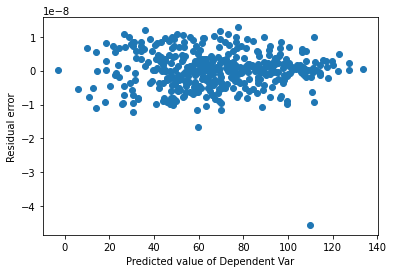

In [21]:
plt.xlabel('Predicted value of Dependent Var')
plt.ylabel('Residual error')
plt.scatter(y_cap, ols_model.resid)
plt.show()

In [23]:
std_deviation = np.std(ols_model.resid)
std_deviation

5.6071056418103345e-09

In [68]:
from statsmodels.tsa.stattools import acf

lags = 3
a_values = acf(residuals, nlags=lags)

# Extract autocorrelation values for each lag
autocorr_lag1 = a_values[1]
autocorr_lag2 = a_values[2] 
autocorr_lag3 = a_values[3]

In [69]:
from scipy.linalg import toeplitz

# Autocorrelation values you've calculated, assuming you have them
autocorr_values = [autocorr_lag1, autocorr_lag2, autocorr_lag3]

# Define the autocorrelation structure
rest_vals = len(y_cap) - len(autocorr_values) - 1
autocorr_structure = np.concatenate([[1.0], autocorr_values, np.zeros(rest_vals)])

# Define the scaling factor (standard deviation)
sigma = std_deviation

# Create the covariance matrix
cov_matrix = sigma**2 * toeplitz(autocorr_structure)

# Use the cov_matrix in your GLS model
gls_model = sm.GLS(y, x, cov_matrix).fit()

gls_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            GLS Regression Results                            
==============================================================================
Dep. Variable:          Dependent Var   R-squared:                       1.000
Model:                            GLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 5.851e+20
Date:                Sat, 28 Oct 2023   Prob (F-statistic):               0.00
Time:                        02:15:25   Log-Likelihood:                 7423.3
No. Observations:                 422   AIC:                        -1.481e+04
Df Residuals:                     406   BIC:                        -1.475e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  32.0000   4.83e-09   6.62e+09      0.000      32.000      32.000
Explanatory Var #1      1.3000   3.94e-11    3.3e+10      0.000       1.300       1.300
Explanatory Var #2      1.7000   2.86e-11   5.94e+10      0.000       1.700       1.700
Explanatory Var #3      6.2000   5.53e-10   1.12e+10      0.000       6.200       6.200
Explanatory Var #4      2.1000    3.4e-11   6.18e+10      0.000       2.100       2.100
Explanatory Var #5     -0.9000   3.92e-11   -2.3e+10      0.000      -0.900      -0.900
Explanatory Var #6  -5.847e-12   2.41e-11     -0.242      0.809   -5.33e-11    4.16e-11
Explanatory Var #7   5.108e-11   1.87e-11      2.733      0.007    1.43e-11    8.78e-11
Explanatory Var #8  -8.014e-11   2.53e-10     -0.316      0.752   -5.78e-10    4.18e-10
Explanatory Var #9  -6.289e-12   3.24e-11     -0.194      0.846      -7e-11    5.74e-11
Explanatory Var #10  3.225e-13   4.04e-11      0.008      0.994   -7.92e-11    7.98e-11
Explanatory Var #11  1.431e-10   3.88e-11      3.689      0.000    6.68e-11    2.19e-10
Explanatory Var #12  1.929e-11   2.89e-11      0.667      0.505   -3.76e-11    7.62e-11
Explanatory Var #13  2.232e-12    5.6e-10      0.004      0.997    -1.1e-09     1.1e-09
Explanatory Var #14  4.508e-11   3.38e-11      1.335      0.182   -2.13e-11    1.11e-10
Explanatory Var #15 -5.871e-11    4.1e-11     -1.433      0.153   -1.39e-10    2.18e-11
==============================================================================
Omnibus:                      150.434   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1476.749
Skew:                          -1.227   Prob(JB):                         0.00
Kurtosis:                      11.830   Cond. No.                     3.26e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.26e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [62]:
data={'OLS_MODEL':ols_model.bse, 'GLS_MODEL':gls_model.bse}
 
print(pd.DataFrame(data=data))

                        OLS_MODEL     GLS_MODEL
const                5.006998e-09  4.832653e-09
Explanatory Var #1   4.042838e-11  3.940619e-11
Explanatory Var #2   2.937225e-11  2.860162e-11
Explanatory Var #3   5.639089e-10  5.526826e-10
Explanatory Var #4   3.471878e-11  3.400671e-11
Explanatory Var #5   4.068917e-11  3.916284e-11
Explanatory Var #6   2.455557e-11  2.412501e-11
Explanatory Var #7   1.897048e-11  1.869104e-11
Explanatory Var #8   2.578074e-10  2.533272e-10
Explanatory Var #9   3.295827e-11  3.239648e-11
Explanatory Var #10  4.108144e-11  4.042761e-11
Explanatory Var #11  3.972833e-11  3.879106e-11
Explanatory Var #12  2.972312e-11  2.893523e-11
Explanatory Var #13  5.694347e-10  5.603473e-10
Explanatory Var #14  3.495892e-11  3.375861e-11
Explanatory Var #15  4.163043e-11  4.096038e-11


In [63]:
sigma_matrix = np.identity(len(y_cap))
np.fill_diagonal(sigma_matrix, np.exp(std_deviation))

## Part C

In [70]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import linear_model as lm

In [73]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.5, random_state=42)

In [74]:
# lasso
model_lasso = lm.Lasso(alpha=1).fit(X_train, y_train)
model_lasso.coef_

array([ 0.        ,  1.26972628,  1.68394638,  2.02626245,  2.08756512,
       -0.91746375, -0.        ,  0.        , -0.        ,  0.        ,
       -0.        ,  0.01314162,  0.        , -0.        ,  0.        ,
       -0.03617731])

In [75]:
y_pred = model_lasso.predict(X_test)

In [76]:
errors = np.abs((y_test - y_pred) / y_test)
mape = np.mean(errors) * 100
mape

4.432190196896342

## Part D

In [5]:
def generate_demand():
    """
    Generates a DataFrame with the actual and advance demand
    quantities from the example in the book.
    """
    demand_df = pd.DataFrame()
    # actual demand values    
    actual = [100, 112, 107, 103, 91,
              85, 84, 85, 79, 81,
              134, 86, 99, 89, 111,
              114, 118, 163, 193, 143,
              144, 202, 158, 160, 144]

    # advance demand values    
    advance = [71, 30, 75, 64, 41,
               51, 42, 51, 57, 49,
               134, 52, 99, 56, 81,
               79, 73, 163, 193, 99,
               91, 202, 105, 101, 96]

    demand_df['Month'] = np.arange(1, 26)
    demand_df['Demand'] = actual
    demand_df['Advance_Demand'] = advance

    return demand_df

In [6]:
demands = generate_demand()

In [10]:
demand = list(demands['Demand'])
ad = list(demands['Advance_Demand']) 

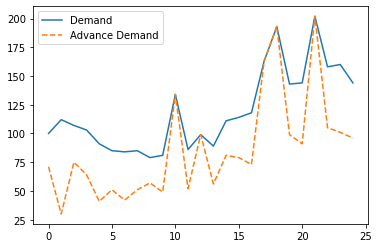

In [11]:
plt.plot(demand, label = "Demand", linestyle="-") 
plt.plot(ad, label = "Advance Demand", linestyle="--") 
plt.legend() 
plt.show()

In [16]:
Y = demand[1:]
X = demand[: -1]
L = ad[1:]

In [ ]:
from scipy.lianlg import solve, eig
import plotly.graph_objects as go
from dash import dash_table